<a href="https://colab.research.google.com/github/jcdevaney/pyAMPACTtutorials/blob/main/Tutorial_02_pyAMPACT_symbolic_Importing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>pyAMPACT Symbolic Data: Importing and Representations</h1>

In [11]:
# You will have to run this cell twice

from IPython.utils import io
!pip install mido
!pip install pyampact
import pyampact
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/jcdevaney/pyAMPACTtutorials.git

Cloning into 'pyAMPACTtutorials'...
remote: Enumerating objects: 1007, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 1007 (delta 101), reused 97 (delta 78), pack-reused 869 (from 1)
Receiving objects: 100% (1007/1007), 147.37 MiB | 25.75 MiB/s, done.
Resolving deltas: 100% (453/453), done.
Updating files: 100% (554/554), done.


Load a symbolic file, symbolic files can be any format supported by music21 (kern, xml, mei, midi, abc, etc.).

In [3]:
piece = pyampact.Score('/content/pyAMPACTtutorials/test_files/Mozart_K179_seg.krn')

# show the score (from an existing image file)
img = mpimg.imread('/content/pyAMPACTtutorials/test_files/Mozart_K179_seg.png')
plt.imshow(img)
plt.axis('off')
plt.show()

NameError: name 'mpimg' is not defined

Metadata can be accessed/printed by passing different arguements to the `.metadata` method

In [ ]:
print(f'-> Successfully imported {piece.metadata["title"]} by {piece.metadata["composer"]}.\n')

List all the public methods and properties available on score objects:

In [ ]:
print(piece.public)

Most of these are methods you can call on the Score object to get back a pandas dataframe (df) containing one type of data. For example, .durations() returns a df of the durations of all the notes and rests in the piece, as shown in the cell below. The columns are the names of the different parts in the piece according to the score encoding. We can see that there are four parts, shown as columns. Musical time serves as the index (the left-most numbers) for the rows. They are notated in music21 offsets, which indicate the number of quarter notes since the beginning of the piece. So 0 is the beginning of the piece and the second row of the table (at index 8.0) contains an event in each of the first two columns. If there is no new events at a particular moment in the piece, it gets filled with a placeholder NaN.

In [4]:
piece.durations()

,Part-1,Part-2
0.00000,2.00000,1.0
1.00000,NaN,1.0
2.00000,0.25000,1.0
2.25000,0.25000,NaN
2.50000,0.25000,NaN
2.75000,0.25000,NaN
3.00000,0.50000,1.0
3.50000,0.50000,NaN
4.00000,1.50000,1.0
5.00000,NaN,1.0


.durations() provides durations of all score events, but doesn't indicate whether an event is a note or a rest. This information is available in the `.midiPitches()` table. MIDI pitch is represented in it's standard form (from 0 to 127 inclusive, where 60 is middle C (C4), 61 is C#/Db, 72 is C5, etc.) and -1s are used for rests.

In [5]:
piece.midiPitches()

,Part-1,Part-2
0.00000,79.0,48.0
1.00000,NaN,52.0
2.00000,77.0,48.0
2.25000,76.0,NaN
2.50000,74.0,NaN
2.75000,72.0,NaN
3.00000,79.0,50.0
3.50000,77.0,NaN
4.00000,74.0,47.0
5.00000,NaN,43.0


Scientific pitch notation is available from the `.notes()` instead.

In [6]:
piece.notes()

,Part-1,Part-2
0.00000,G5,C3
1.00000,NaN,E3
2.00000,F5,C3
2.25000,E5,NaN
2.50000,D5,NaN
2.75000,C5,NaN
3.00000,G5,D3
3.50000,F5,NaN
4.00000,D5,B2
5.00000,NaN,G2


A piano roll representation of the piece is also available as a 128-column table. Each row represents a midi pitch (0-127 inclusive) and the columns correspond to musical time in the piece in the same way as the rows do in the tables above. Rests are not represented here, not is which which voice/part a given note belongs to.

In [7]:
pianoRoll = piece.pianoRoll()
pianoRoll

,0.00000,1.00000,2.00000,2.25000,2.50000,2.75000,3.00000,3.50000,4.00000,5.00000,5.50000,6.00000,6.33333,6.50000,6.66667,7.00000,8.00000,9.00000,10.00000,11.00000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualizing the output of .pianoroll() provides a more informative representation.


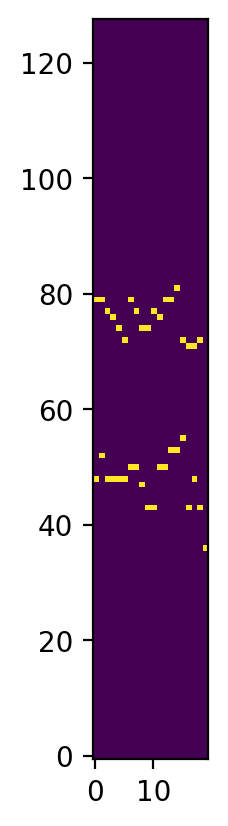

In [12]:
plt.imshow(pianoRoll, origin='lower')

Extending on the pianoRoll, the .sampled() method samples pianoRoll df at regular time intervals. It assumes the beat to be the quarter note and takes bpm and obs parameters to determine how often to sample the pianoRoll. The equation for the regular time intervals is (60/bpm)/obs. With the default values of 60 and 20 for bpm and obs respectively, this results in 20 observations per quarter note.

In [9]:
sampled = piece.sampled()

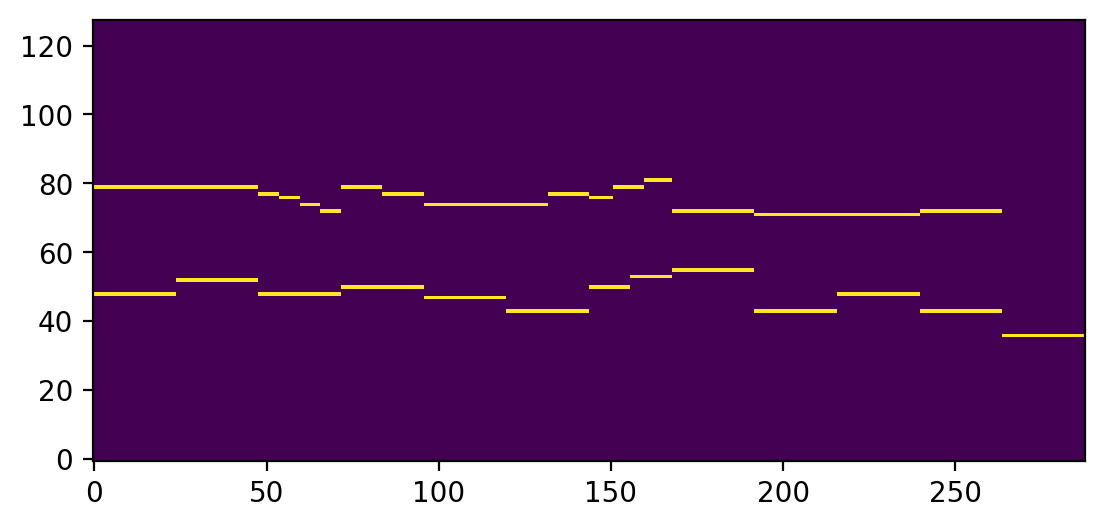

In [13]:
plt.imshow(sampled, origin='lower')

The `.mask()` method generates a spectrogram-like mask of the symbolic data, suitable for running DTW alignment on.

`.mask()` takes the following variables (listed with their default values)
* winms=100,         # together with sample_rate, determines how many pitch (y-axis) bins there are
* sample_rate=2000,  # together with winms, determines how many pitch (y-axis) bins there are
* num_harmonics=1,   # how many harmonics to include, remember that 1 is the pitch itself
* width=0,           # the number of "spectrogram" bins each note covers
* bpm=60,            # beats per minute
* aFreq=440,         # specify tuning by giving the tuning of A4
* base_note=0,       # the lowest pitch in the midi system
* tuning_factor=1,   # 2 cents flat would be .98
* obs=20             # observations per second

In [14]:
# mask with 4 harmonics and a bin width of 1
mask = piece.mask(num_harmonics=4, width=1)
mask

,0.000000,0.041667,0.083333,0.125000,0.166667,0.208333,0.250000,0.291667,0.333333,0.375000,...,11.583333,11.625000,11.666667,11.708333,11.750000,11.791667,11.833333,11.875000,11.916667,11.958333
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


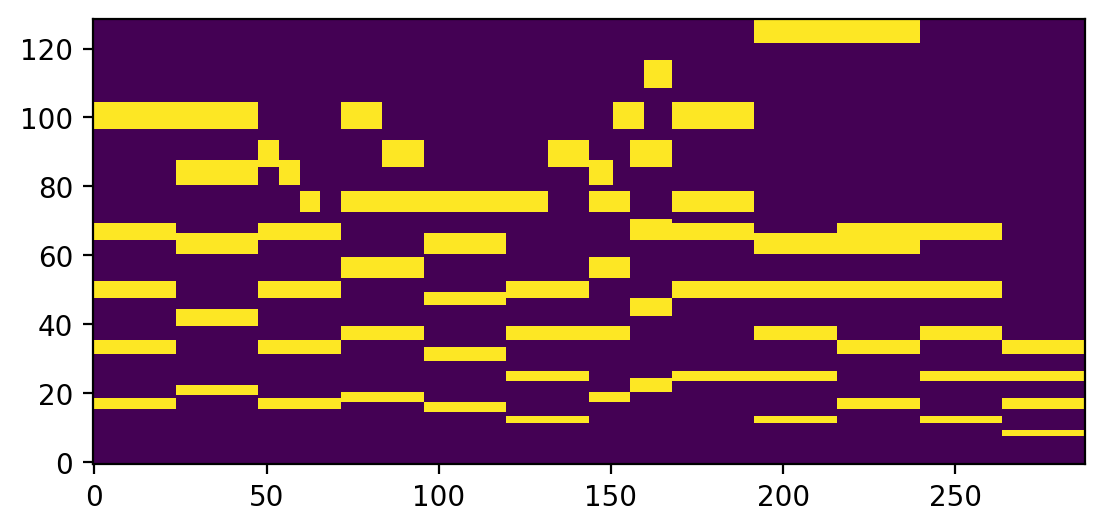

In [15]:
plt.imshow(mask, origin='lower')

The Score object also represents symbolic score data in an nmat (note matrix) table (adapted from the similarly named object in the MIDI Toolbox: https://github.com/miditoolbox/1.1).

An nmat table provides
* an XML_ID for each note (which faciliates linking between importing and exporting of data)
* the measure number that each note occurs in
* note onset and duration in beats
* which musical part each note occurs in
* the MIDI note value for each note
* estimated note onset and offset time in seconds (this is initially estimated from a default BPM but subsequently updated with the aligned audio times)



In [16]:
piece.nmats()

{'Part-1':                  MEASURE     ONSET  DURATION    PART  MIDI  ONSET_SEC  \
 XML_ID                                                                  
 133605210966928        1   0.00000   1.05000  Part-1  79.0    0.00000   
 133605211543568        1   2.00000   0.13125  Part-1  77.0    1.05000   
 133605211544784        1   2.25000   0.13125  Part-1  76.0    1.18125   
 133605211545872        1   2.50000   0.13125  Part-1  74.0    1.31250   
 133605211546896        1   2.75000   0.13125  Part-1  72.0    1.44375   
 133605211549584        2   3.00000   0.26250  Part-1  79.0    1.57500   
 133605211550544        2   3.50000   0.26250  Part-1  77.0    1.83750   
 133605211551440        2   4.00000   0.78750  Part-1  74.0    2.10000   
 133605211552336        2   5.50000   0.26250  Part-1  77.0    2.88750   
 133605209588688        3   6.00000   0.17500  Part-1  76.0    3.15000   
 133605209590800        3   6.33333   0.17500  Part-1  79.0    3.32500   
 133605209592144        3   

Nmat tables are a dictionary of one table per part. The part names are the keys and the tables are the values. Individual parts can be accessed by passing the part name to the nmat dictionary.

In [17]:
nmat_dict = piece.nmats()
nmat_dict['Part-1']

,MEASURE,ONSET,DURATION,PART,MIDI,ONSET_SEC,OFFSET_SEC
XML_ID,,,,,,,
133605210966928,1,0.00000,1.05000,Part-1,79.0,0.00000,1.05000
133605211543568,1,2.00000,0.13125,Part-1,77.0,1.05000,1.18125
133605211544784,1,2.25000,0.13125,Part-1,76.0,1.18125,1.31250
133605211545872,1,2.50000,0.13125,Part-1,74.0,1.31250,1.44375
133605211546896,1,2.75000,0.13125,Part-1,72.0,1.44375,1.57500
133605211549584,2,3.00000,0.26250,Part-1,79.0,1.57500,1.83750
133605211550544,2,3.50000,0.26250,Part-1,77.0,1.83750,2.10000
133605211551440,2,4.00000,0.78750,Part-1,74.0,2.10000,2.88750
133605211552336,2,5.50000,0.26250,Part-1,77.0,2.88750,3.15000
